# Module 2: Lab Submission
## Supervised Learning Exploration

- **Prepared by:** Varit Kobutra W216632608@student.hccs.edu
- **Prepared for:** Prof. Machuria M. Johnson
- **GitHub Repo:** https://github.com/henrykobutra/mushroom-classification

Using a mushroom dataset as provided by @prishasawhney (https://www.kaggle.com/prishasawhney) which was already cleaned up from the original mushroom dataset from UCI

In [17]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import mglearn

print("No issues with imports")

No issues with imports


In [18]:
# Loading and exploring the data
data = pd.read_csv("data/mushroom_cleaned.csv")

# Explore the dataset
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [19]:
# Check for missing values
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [20]:
# One-Hot Encoding for Categorical Variables
categorical_features = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']
numerical_features = ['cap-diameter', 'stem-height', 'stem-width']

# ColumnTransformer for preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing
X = data.drop('class', axis=1)
y = data['class']

X_preprocessed = preprocessor.fit_transform(X)


In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

## Implement Supervised Learning Algorithms

In [22]:
# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807

KNN Accuracy Score: 0.9892662163412603


In [23]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      4909
           1       0.77      0.77      0.77      5898

    accuracy                           0.75     10807
   macro avg       0.74      0.74      0.74     10807
weighted avg       0.75      0.75      0.75     10807

Logistic Regression Accuracy Score: 0.7459054316646618


## Model Evaluation and Comparison

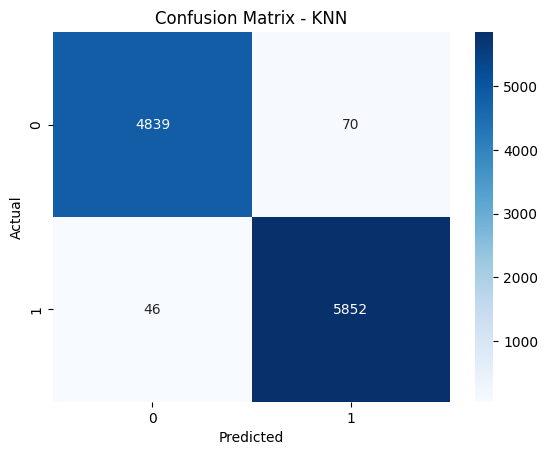

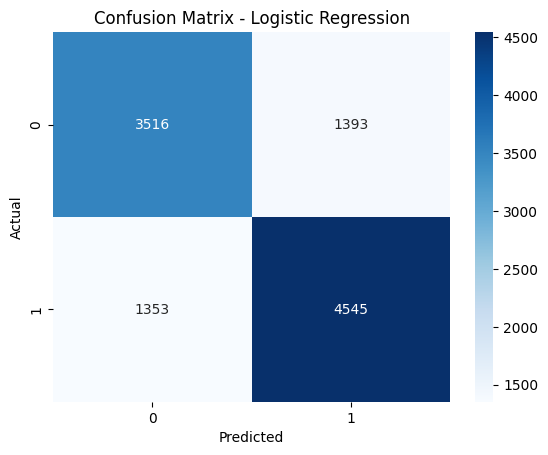

In [24]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
